In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing Scikit Learn
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_linnerud
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
import optuna

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("est_delta_prediction_1118.csv")
data.head()

,title,platform,studio,genre,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,...,sfox,shbo,sother,release_date,first_seen_est_date,est_delta,SmallBudget,MediumBudget,LargeBudget,UnknownBudget
0,Julien & Claire,iTunes,Other,Romance,1,0,0,1,0,0,...,0,0,1,2012-01-12,2023-07-18,4205,0,0,0,1
1,POP-U-larity!,iTunes,Other,Comedy,1,0,0,1,0,0,...,0,0,1,2012-02-21,2023-06-14,4131,0,0,0,1
2,Blame (2012),iTunes,Other,Drama,1,0,0,1,0,0,...,0,0,1,2012-03-03,2023-06-24,4130,0,0,0,1
3,Rose,iTunes,Other,Drama,1,0,0,1,0,0,...,0,0,1,2012-04-15,2023-08-05,4129,1,0,0,0
4,Timmy Time: Timmy's Seaside Rescue,iTunes,Other,Kids & Family,0,0,1,1,0,0,...,0,0,1,2012-07-13,2023-10-24,4120,0,0,0,1


In [3]:
data.columns

Index(['title', 'platform', 'studio', 'genre', 'PreCovid', 'Covid',
       'PostCovid', 'pitunes', 'pamazon', 'pvudu', 'pappletv', 'pgoogle',
       'swb', 'ssony', 'suni', 'spara', 'sdis', 'sfox', 'shbo', 'sother',
       'release_date', 'first_seen_est_date', 'est_delta', 'SmallBudget',
       'MediumBudget', 'LargeBudget', 'UnknownBudget'],
      dtype='object')

In [4]:
data_ = data.drop(['title','platform','studio',
                   'genre','first_seen_est_date'],axis = 1)
data_.head()

,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,pgoogle,swb,ssony,...,sdis,sfox,shbo,sother,release_date,est_delta,SmallBudget,MediumBudget,LargeBudget,UnknownBudget
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,2012-01-12,4205,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,2012-02-21,4131,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,2012-03-03,4130,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,2012-04-15,4129,1,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,2012-07-13,4120,0,0,0,1


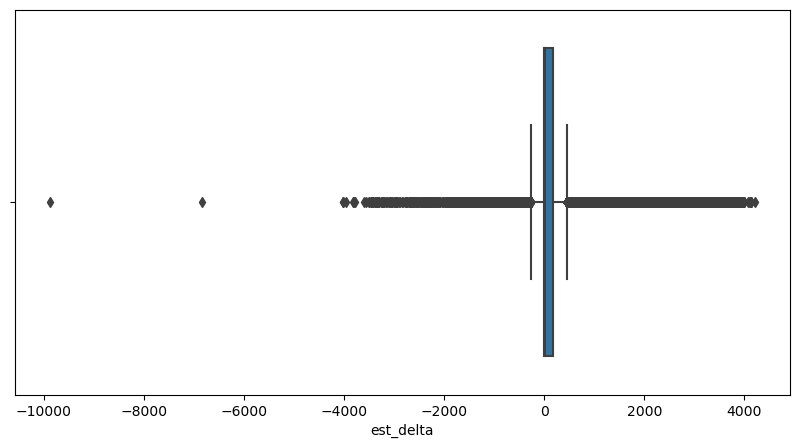

In [5]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = data_['est_delta'], orient = 'h')
plt.show()

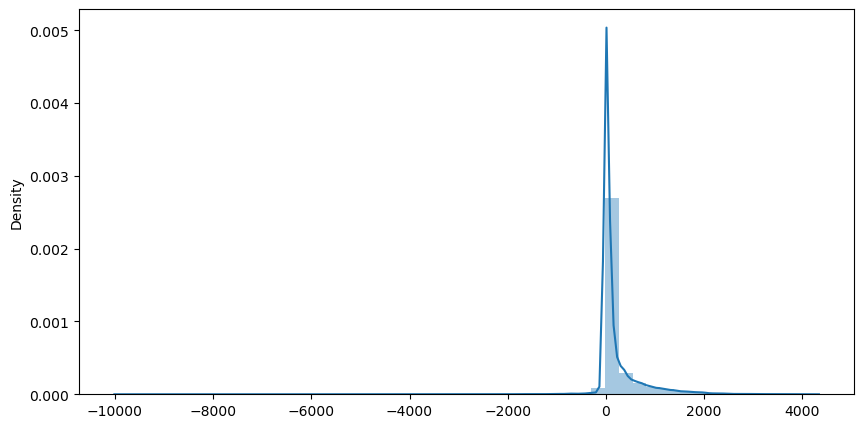

In [6]:
plt.figure(figsize = (10, 5))
sns.distplot(x = data_['est_delta'], hist = True)
plt.show()

In [7]:
data_['est_delta'].skew()

2.201635514118643

In [8]:
def find_bounds_range(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    bounds = (lower_bound, upper_bound)
    return bounds

In [9]:
bounds_temp = find_bounds_range(data_['est_delta'])
print(bounds_temp)

(-270.0, 450.0)


In [10]:
def find_bounds(data_):
    Q1 = data_['est_delta'].quantile(0.25)
    Q3 = data_['est_delta'].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    new_data = data_[(data_['est_delta'] >= 0) & (data_['est_delta'] <= 365)]
    return new_data

In [11]:
data_1 = find_bounds(data_)

In [12]:
data_1.head()

,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,pgoogle,swb,ssony,...,sdis,sfox,shbo,sother,release_date,est_delta,SmallBudget,MediumBudget,LargeBudget,UnknownBudget
18794,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,2021-10-17,365,0,0,0,1
18795,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,2020-10-05,365,0,0,0,1
18796,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,2019-01-31,365,0,0,0,1
18797,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,2021-10-04,365,0,0,0,1
18798,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,2020-05-11,365,1,0,0,0


In [13]:
data_1['release_date'] =  pd.to_datetime(data_1['release_date'], errors = 'coerce')
data_1['release_year'] = data_1['release_date'].dt.year
data_1['release_month'] = data_1['release_date'].dt.month
data_1['release_day'] = data_1['release_date'].dt.day

In [14]:
data_1 = data_1.drop('release_date', axis = 1)

In [15]:
data_1['release_year'] = data_1['release_year'].astype(int)
data_1['release_month'] = data_1['release_month'].astype(int)
data_1['release_day'] = data_1['release_day'].astype(int)

In [16]:
# # Create a boolean mask to select rows with January 1st
# mask = (data_1['release_month'] == 1) & (data_1['release_day'] == 1) & (data_1['pgoogle'] == 1)

# # Use the .drop() function to remove the rows that meet the condition
# data_1 = data_1.drop(data_1[mask].index)

In [17]:
data_1.shape

(84911, 24)

In [18]:
X = data_1.drop(['est_delta'], axis=1)
y = data_1['est_delta']

In [25]:
def Linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {mse**0.5}")
    print(f"R-squared: {r2*100}")

In [20]:
def Decision_tree(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {mse**0.5}")
    print(f"R-squared: {r2*100}")

In [21]:
def Random_forest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators = 100, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {mse**0.5}")
    print(f"R-squared: {r2*100}")

In [22]:
def Ridge_(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = Ridge()
    model = Ridge(alpha = 10.0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {mse**0.5}")
    print(f"R-squared: {r2*100}")

In [23]:
def Knn_(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {mse**0.5}")
    print(f"R-squared: {r2*100}")

In [26]:
print('Linear Regression:\n')
Linear_regression(X,y)

Linear Regression:

[46.31445312 40.12304688 36.95898438 ... 50.5859375  37.421875
 54.72460938]
Mean Absolute Error: 57.29719091794
Root Mean Squared Error: 79.43162739068244
R-squared: 11.936613514889471


In [24]:
print('Linear Regression:\n')
Linear_regression(X,y)
print('\nDecision Tree Regresor:\n')
Decision_tree(X,y)
print('\nRandom Forest Regressor:\n')
Random_forest(X,y)
print('\nRidge Regression:\n')
Ridge_(X,y)
print('\nKNN:\n')
Knn_(X,y)

Linear Regression:

Mean Absolute Error: 57.29719091794
Root Mean Squared Error: 79.43162739068244
R-squared: 11.936613514889471

Decision Tree Regresor:

Mean Absolute Error: 50.36704753422591
Root Mean Squared Error: 82.7314894968232
R-squared: 4.467718813717559

Random Forest Regressor:

Mean Absolute Error: 48.45612412772701
Root Mean Squared Error: 76.12406481850023
R-squared: 19.11790306785338

Ridge Regression:

Mean Absolute Error: 57.269730675164396
Root Mean Squared Error: 79.42949668297231
R-squared: 11.941337950887988

KNN:

Mean Absolute Error: 50.37325560854973
Root Mean Squared Error: 78.65831911794568
R-squared: 13.642952723203827
